### ABSTRACT:

#### This study utilizes logistic regression to predict the likelihood of a customer making a purchase based on their gender, age, and estimated salary. The dataset includes information about customers' demographics and purchase behavior.

#### After training the logistic regression model on a portion of the dataset, it is evaluated using metrics such as accuracy, precision, recall, and F1-score. The model's performance is then assessed by predicting purchases for the remaining portion of the dataset.

#### The results demonstrate the effectiveness of logistic regression in predicting customer purchases based on the provided features. However, further feature engineering and model tuning may enhance the model's predictive performance. Overall, this study showcases the potential of logistic regression in understanding and predicting customer behavior.






In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
suv_data=pd.read_csv('suv.csv')
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
suv_data.shape

(400, 5)

In [4]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<Axes: xlabel='Purchased', ylabel='count'>

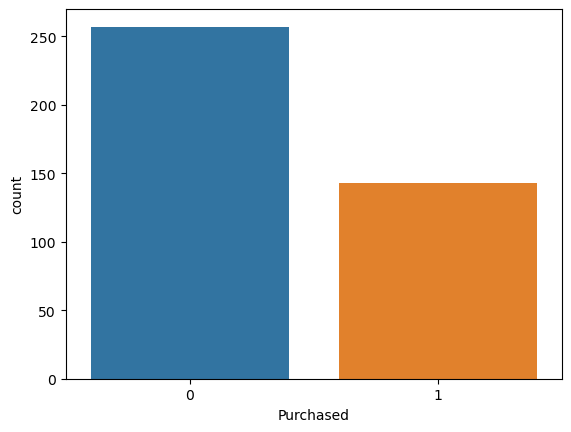

In [5]:
sns.countplot(x='Purchased',data=suv_data)

<Axes: xlabel='Purchased', ylabel='count'>

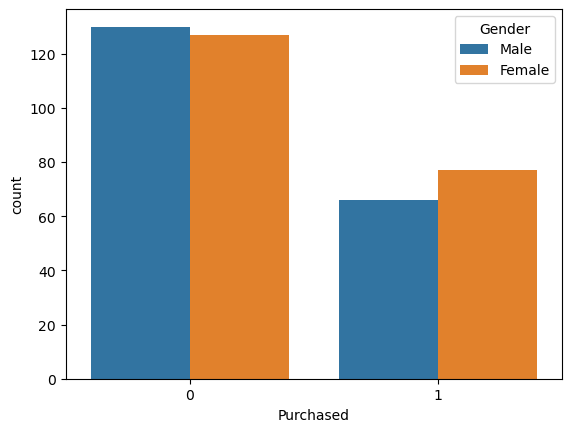

In [6]:
sns.countplot(x='Purchased',data=suv_data,hue='Gender')

In [7]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

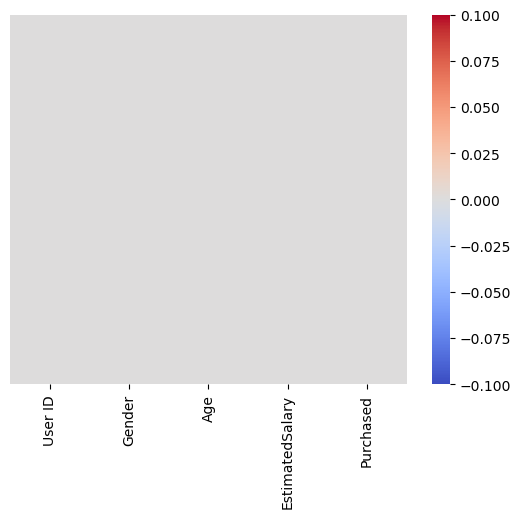

In [8]:
sns.heatmap(suv_data.isnull(),yticklabels=False,cmap='coolwarm')

In [9]:
suv_data.drop(('User ID'),axis=1,inplace=True)

In [10]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [11]:
pd.get_dummies(suv_data['Gender'])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [12]:
sex=pd.get_dummies(suv_data['Gender'],drop_first=True)

In [13]:
suv_data.drop('Gender',axis=1,inplace=True)

In [14]:
suv_data=pd.concat([suv_data,sex],axis=1)

In [15]:
suv_data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


### test

In [16]:
x=suv_data.drop("Purchased",axis=1)
y=suv_data["Purchased"]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

accuracy=accuracy_score(y_test,y_predicted)
print("Accuracy: ",accuracy)

confusion_mat=confusion_matrix(y_test,y_predicted)
print("Confusion Matrix: ")
print(confusion_mat)

classification_rep=classification_report(y_test,y_predicted)
print('Classification Report: ')
print(classification_rep)

Accuracy:  0.6
Confusion Matrix: 
[[48  0]
 [32  0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        48
           1       0.00      0.00      0.00        32

    accuracy                           0.60        80
   macro avg       0.30      0.50      0.37        80
weighted avg       0.36      0.60      0.45        80



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


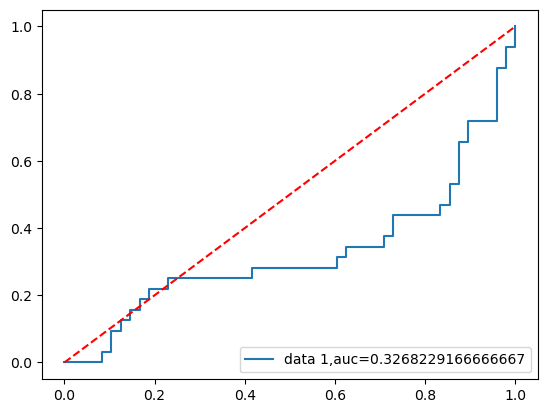

In [20]:
from sklearn import metrics
y_pred_proba=model.predict_proba(x_test)[::,1]
fpr,tpr, _ =metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba) #area under the curve(auc)
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.plot([0,1],[0,1],'r--')

plt.legend(loc=4)
plt.show()

### log loss

In [22]:
from sklearn.metrics import log_loss

y_p=model.predict_proba(x_test)
logloss=log_loss(y_test,y_p)
print('Logloss: %.2f'%(logloss))

Logloss: 0.69


In [21]:
import joblib
joblib.dump(model,'logistic_suv data.joblib')

['logistic_suv data.joblib']

In [23]:
loaded_model=joblib.load('logistic_suv data.joblib')

Age=1
Estimatedsalary=0
Purchased=0

input_data=[Age,Estimatedsalary,Purchased]
output_data=loaded_model.predict([input_data])     #2D
print(f'The predicted price is Rs.{round(output_data[0])}/-')

The predicted price is Rs.0/-


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
